Nama : Cresenshia Hillary Benida

NIM : 2702247683

# Dataset A (Loan)

Mengenai dataset:

Dataset A terdiri dari 14 kolom dan 45000 baris, berikut adalah penjelasan dari setiap kolom

- person_age = Usia dari orang tersebut
- person_gender = Gender dari orang tersebut
- person_education = Tingkat pendidikan tertinggi
- person_income = Pendapatan tahunan
- person_emp_exp = Tahun pengalaman bekerja
- person_home_ownership = Status kepemilikan tempat huni
- loan_amnt = Jumlah pinjaman yang diminta
- loan_intent = Tujuan dari pinjaman
- loan_int_rate = Suku bunga pinjaman
- loan_percent_income = Jumlah pinjaman sebagai persentase dari pendapatan tahunan
- cb_person_cred_hist_length = Durasi kredit dalam tahun
- credit_score = Skor kredit dari orang tersebut
- previous_loan_defaults_on_file = Indikator tunggakan pinjaman sebelumnya
- loan_status (target variable) = Persetujuan pinjaman; 1: diterima dan 0: ditolak

## Studi Kasus
Anda adalah seorang data scientist dari suatu Perusahaan dan diminta untuk **membuat dan meng deploy model machine learning** dalam melakukan **klasifikasi** berdasarkan case sesuai dengan dataset yang Anda dapatkan dari ketentuan sebelumnya. Lakukan langkah-langkah berikut untuk menyelsaikan tugas Anda: 

## Machine Learning Model
Buatlah model machine learning yang berisi proses **pre-processing machine learning, training, dan hasil dari perbadingan 2 algoritma machine learning yaitu Random Forest dan Xgboost**. Ambil algoritma terbaik dan simpan dengan menggunakan pickle. Seluruh proses disimpan dengan extension .ipynb 

### Explaratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Dataset_A_loan.csv',delimiter=',')

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [5]:
df.shape

(45000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
df.loan_status.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

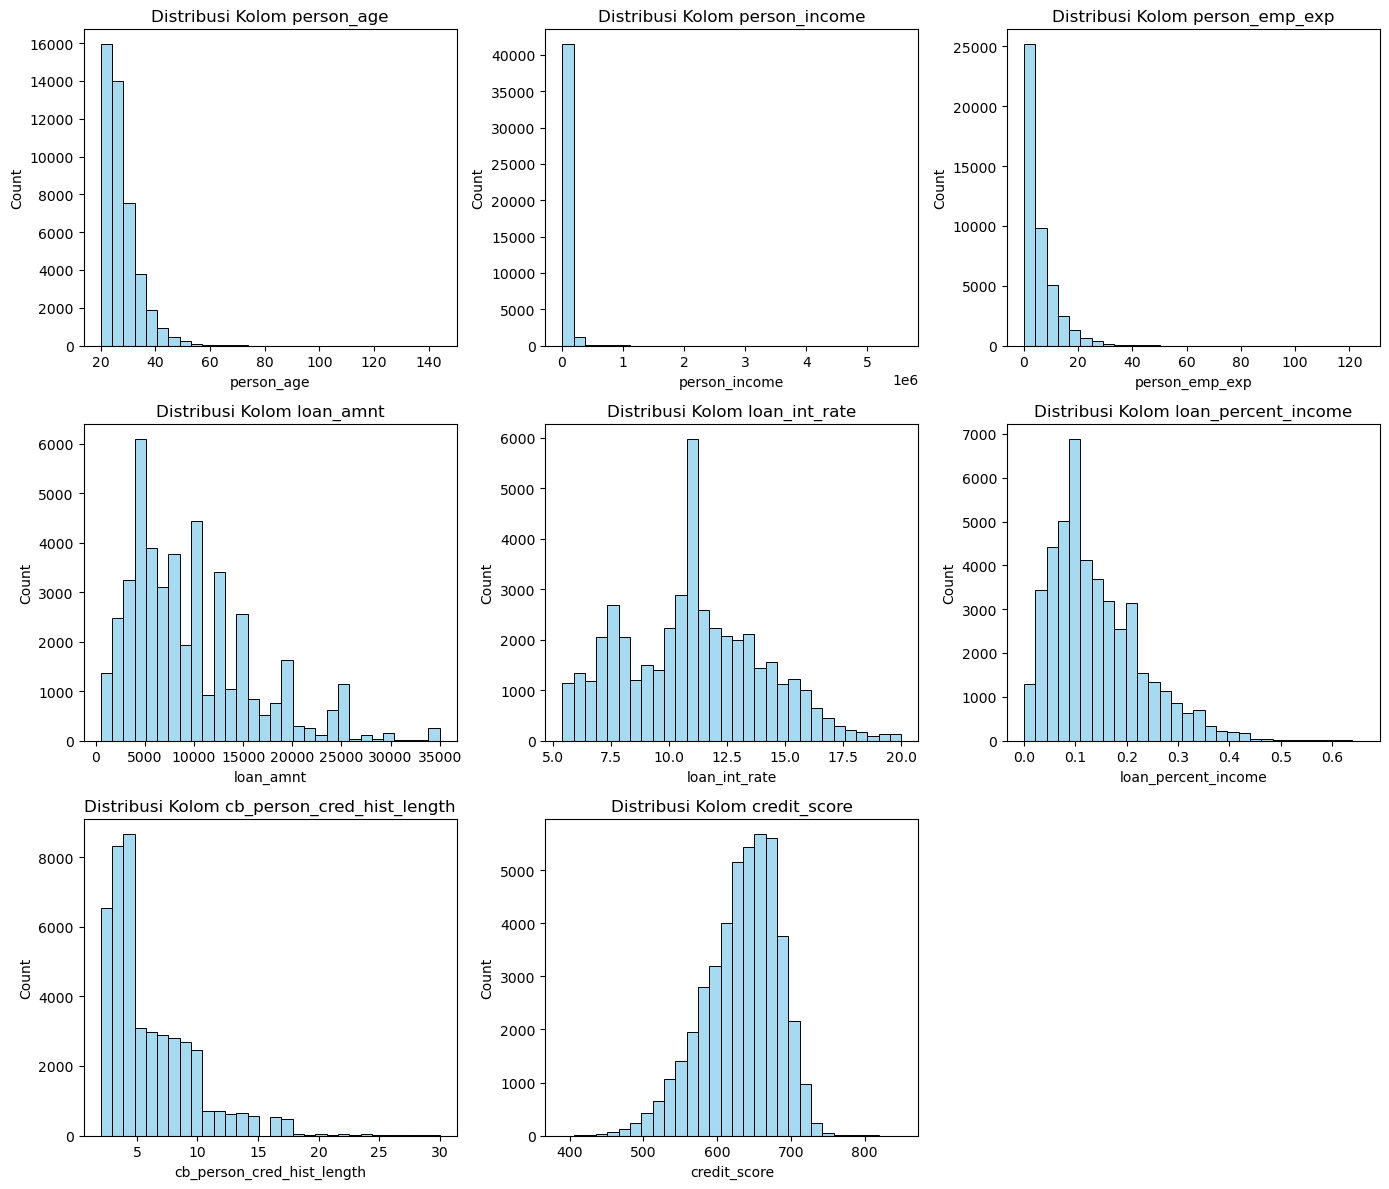

In [8]:
kolom_numerical = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'
]

plt.figure(figsize=(14, 12))
for i, col in enumerate(kolom_numerical):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], bins=30, color='skyblue')
    plt.title(f'Distribusi Kolom {col}')
plt.tight_layout()
plt.show()

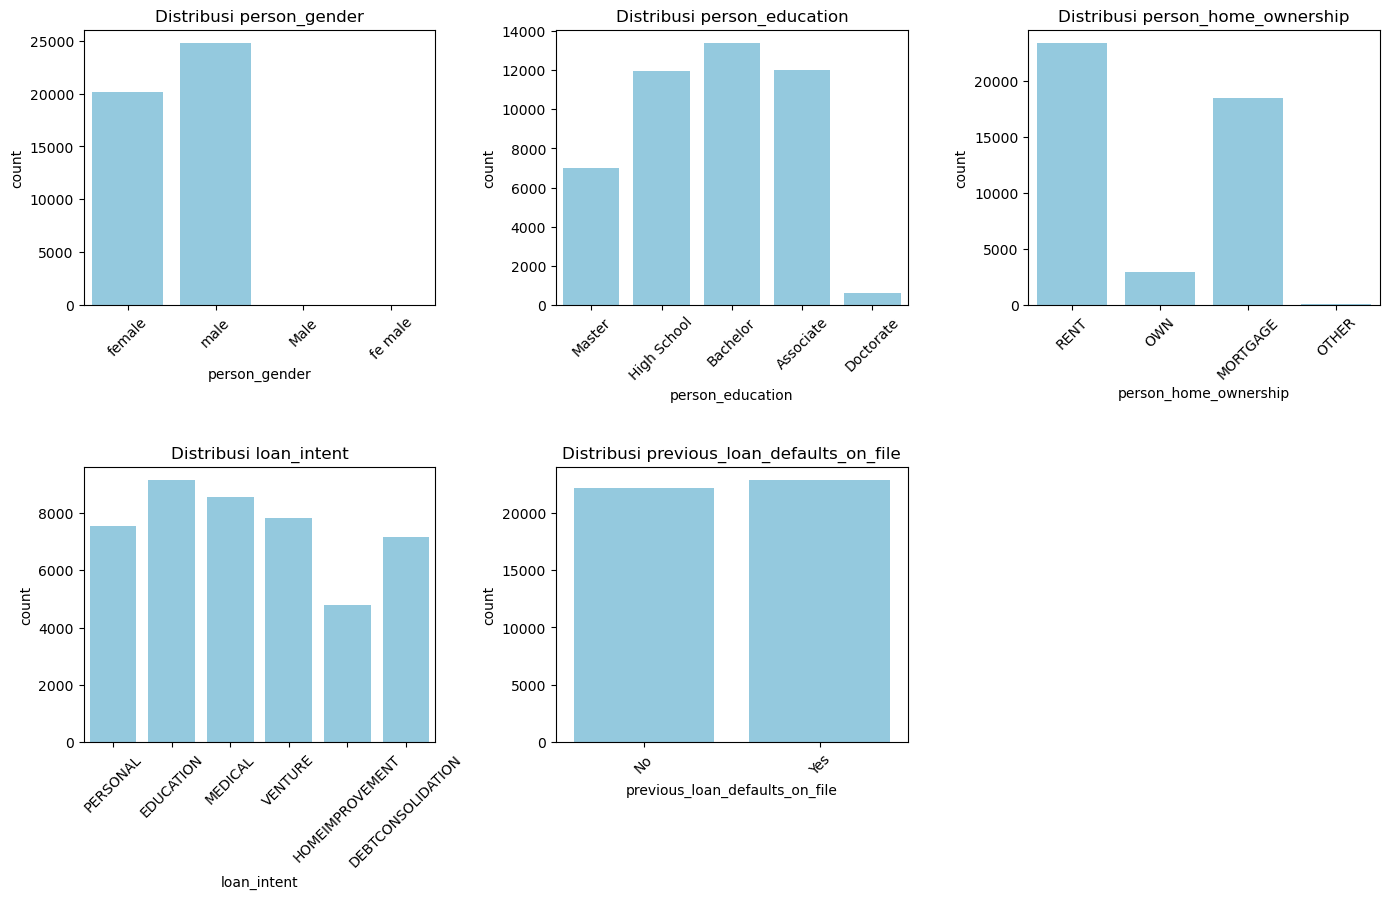

In [9]:
kolom_categorical = [
    'person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'
]

plt.figure(figsize=(14, 12))
for i, col in enumerate(kolom_categorical):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Splitting data
Splitting data menjadi train dan test data dengan proporsi 80:20

In [10]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['loan_status'])  
y = df['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [11]:
print(f"Train size : {len(x_train)}")
print(f"Test size  : {len(x_test)}")

Train size : 36000
Test size  : 9000


In [12]:
x_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
25180,34.0,female,Bachelor,97265.0,11,MORTGAGE,15000.0,PERSONAL,12.73,0.15,9.0,631,No
12555,25.0,male,High School,NaN,3,RENT,12000.0,VENTURE,11.86,0.16,4.0,659,Yes
29153,41.0,female,Master,322597.0,18,MORTGAGE,24000.0,PERSONAL,10.37,0.07,11.0,683,Yes
23838,27.0,male,Associate,94232.0,4,RENT,9600.0,EDUCATION,17.14,0.10,7.0,641,No
35686,27.0,male,Master,NaN,7,RENT,7059.0,HOMEIMPROVEMENT,12.97,0.08,3.0,706,Yes


In [13]:
y_train.tail()

11284    0
44732    1
38158    0
860      1
15795    0
Name: loan_status, dtype: int64

### Unique Value & Data Consistency

In [14]:
kolom_categorical = [
    'person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'
]

{col: x_train[col].unique() for col in kolom_categorical}

{'person_gender': array(['female', 'male', 'fe male', 'Male'], dtype=object),
 'person_education': array(['Bachelor', 'High School', 'Master', 'Associate', 'Doctorate'],
       dtype=object),
 'person_home_ownership': array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object),
 'loan_intent': array(['PERSONAL', 'VENTURE', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'DEBTCONSOLIDATION'], dtype=object),
 'previous_loan_defaults_on_file': array(['No', 'Yes'], dtype=object)}

Dari output diatas, terdapat inkonsistensi value pada kolom `person_gender`. Sehingga saya akan mengubah value sehingga menjadi lebih konsisten dengan melakukan perubahan:
1. `fe male` diubah menjadi `female` 
2. `Male` menjadi `male`

In [15]:
x_train['person_gender'] = x_train['person_gender'].replace({
    'fe male': 'female',
    'Male': 'male'
})

x_test['person_gender'] = x_test['person_gender'].replace({
    'fe male': 'female',
    'Male': 'male'
})

In [16]:
print(x_train['person_gender'].unique())
print(x_test['person_gender'].unique())

['female' 'male']
['male' 'female']


### Duplicated Data

In [17]:
print(x_train.duplicated().sum())
print(x_test.duplicated().sum())

0
0


Dataset tidak memiliki duplicated data

### Check and Handling Outliers

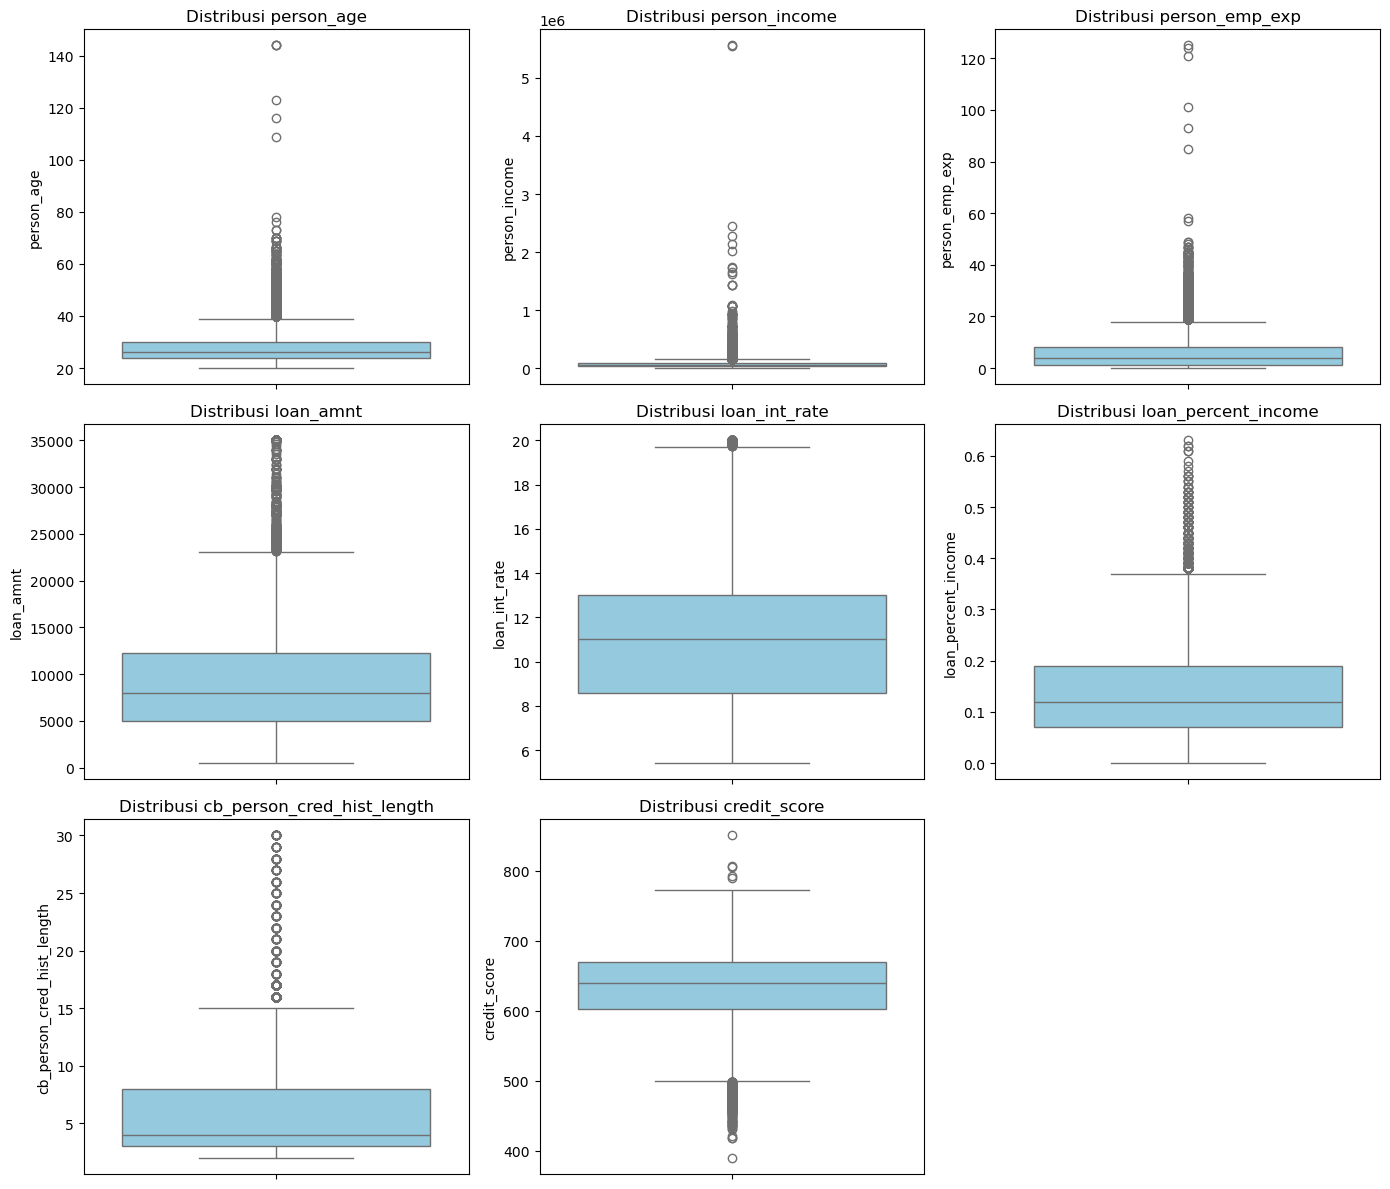

In [18]:
kolom_numerical = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'
]

plt.figure(figsize=(14, 12))
for i, col in enumerate(kolom_numerical):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x_train[col], color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

Pada dataset ini, **saya telah mencoba untuk melakukan scaling pada dataset dan ternyata menghasilkan akurasi yang lebih rendah dibandingkan model tanpa scaling**. Sehingga saya memutuskan untuk tidak melakukan scaling untuk mendapatkan model dengan akurasi yang lebih baik.

**Akurasi Model dengan Scaling**:
- Random Forest : 0.927
- XGBoost : 0.933

**Akurasi Model Tanpa Scaling (saat ini)**:
- Random Forest : 0.929
- XGBoost : 0.934

### Check and Handling Missing Value

In [19]:
x_train.isnull().sum()

person_age                           0
person_gender                        0
person_education                     0
person_income                     1769
person_emp_exp                       0
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
dtype: int64

In [20]:
x_test.isnull().sum()

person_age                          0
person_gender                       0
person_education                    0
person_income                     481
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
dtype: int64

Kolom `person_income` memiliki total missing value sebanyak 2250 data. Kolom ini memiliki hubungan dengan 2 kolom lainnya yaitu kolom `loan_percent_income` dan `loan_amnt`. `loan_percent_income` adalah persentase pinjaman terhadap pendapatan, kolom ini bisa didapatkan dengan membagi nilai dari `loan_amnt` dengan `person_income`. Dengan hubungan tersebut, maka saya bisa mendapatkan velue `person_income` dengan rumus dibawah

`person_income` = `loan_amnt` / `loan_percent_income`.

In [21]:
x_train[['loan_percent_income', 'loan_amnt', 'person_income']].head()

,loan_percent_income,loan_amnt,person_income
25180,0.15,15000.0,97265.0
12555,0.16,12000.0,NaN
29153,0.07,24000.0,322597.0
23838,0.10,9600.0,94232.0
35686,0.08,7059.0,NaN


**Pembuktian Rumus**

Pada row 0 nilai `person_income`nya adalah 71948.0 yang jika hitung dengan rumus sebelumnya didapatkan

`person_income` = 35000.0 / 0.49	
                = 71428.57
                ~ 71948.0

Sehingga nilai missing value ditiap rownya akan diisi oleh hasil dari perhitungan rumus tersebut

In [22]:
missing_row_income = x_train['person_income'].isna()
x_train.loc[missing_row_income, 'person_income'] = (
    x_train.loc[missing_row_income, 'loan_amnt'] / x_train.loc[missing_row_income, 'loan_percent_income']
)

In [23]:
x_train.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
dtype: int64

In [24]:
missing_row_income_2 = x_test['person_income'].isna()
x_test.loc[missing_row_income_2, 'person_income'] = (
    x_test.loc[missing_row_income_2, 'loan_amnt'] / x_test.loc[missing_row_income_2, 'loan_percent_income']
)

In [25]:
x_test.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
dtype: int64

In [26]:
median_income_train = x_train['person_income'].replace([np.inf, -np.inf], np.nan).median()
x_train.loc[np.isinf(x_train['person_income']), 'person_income'] = median_income_train

median_income_test = x_test['person_income'].replace([np.inf, -np.inf], np.nan).median()
x_test.loc[np.isinf(x_test['person_income']), 'person_income'] = median_income_test

### Encoding

In [27]:
kolom_categorical = [
    'person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'
]

{col: x_train[col].unique() for col in kolom_categorical}

{'person_gender': array(['female', 'male'], dtype=object),
 'person_education': array(['Bachelor', 'High School', 'Master', 'Associate', 'Doctorate'],
       dtype=object),
 'person_home_ownership': array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object),
 'loan_intent': array(['PERSONAL', 'VENTURE', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'DEBTCONSOLIDATION'], dtype=object),
 'previous_loan_defaults_on_file': array(['No', 'Yes'], dtype=object)}

Kolom `person_gender` dan `previous_loan_defaults_on_file` hanya memiliki 2 unique value sehingga saya menggunakan binary encoding. Sedangkan untuk kolom `person_home_ownership` dan `loan_intent` memiliki lebih dari 2 unique value tanpa hubungan ordinal sehingga saya menggunakan one-hot encoding. Untuk kolom `person_education` memiliki lebih dari 2 unique value dengan hubungan ordinal yaitu urutan tingkat pendidikan sehingga saya menggunakan label encoding.

#### `person_gender` dengan Binary Encoding

In [28]:
encode_gender = {"person_gender": {"male":1,"female" :0}}

x_train = x_train.replace(encode_gender)
x_test  = x_test.replace(encode_gender)

#### `previous_loan_defaults_on_file` dengan Binary Encoding

In [29]:
encode_previous_loan_defaults_on_file = {"previous_loan_defaults_on_file": {"Yes":1,"No" :0}}

x_train = x_train.replace(encode_previous_loan_defaults_on_file)
x_test  = x_test.replace(encode_previous_loan_defaults_on_file)

#### `person_education` dengan Label Encoding

In [30]:
encode_person_education = {"person_education": {"High School":0, "Associate": 1, "Bachelor": 2, "Master": 3, "Doctorate": 4}}

x_train = x_train.replace(encode_person_education)
x_test  = x_test.replace(encode_person_education)

#### `person_home_ownership` & `loan_intent` dengan One-Hot Encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder

home_encode_train = x_train[['person_home_ownership']]
loan_encode_train = x_train[['loan_intent']]

home_encode_test = x_test[['person_home_ownership']]
loan_encode_test = x_test[['loan_intent']]

home_onehotencoder = OneHotEncoder()
loan_onehotencoder = OneHotEncoder()

home_encode_train = pd.DataFrame(home_onehotencoder.fit_transform(home_encode_train).toarray(),columns=home_onehotencoder.get_feature_names_out())
loan_encode_train = pd.DataFrame(loan_onehotencoder.fit_transform(loan_encode_train).toarray(),columns=loan_onehotencoder.get_feature_names_out())

home_encode_test = pd.DataFrame(home_onehotencoder.transform(home_encode_test).toarray(),columns=home_onehotencoder.get_feature_names_out())
loan_encode_test = pd.DataFrame(loan_onehotencoder.transform(loan_encode_test).toarray(),columns=loan_onehotencoder.get_feature_names_out())

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

x_train_enc = pd.concat([x_train,home_encode_train,loan_encode_train], axis=1)
x_test_enc  = pd.concat([x_test,home_encode_test,loan_encode_test], axis=1)

In [32]:
x_train_enc.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,34.0,0,2,97265.0,11,MORTGAGE,15000.0,PERSONAL,12.73,0.15,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25.0,1,0,75000.0,3,RENT,12000.0,VENTURE,11.86,0.16,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41.0,0,3,322597.0,18,MORTGAGE,24000.0,PERSONAL,10.37,0.07,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,1,1,94232.0,4,RENT,9600.0,EDUCATION,17.14,0.10,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,27.0,1,3,88237.5,7,RENT,7059.0,HOMEIMPROVEMENT,12.97,0.08,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Define Features for Modelling

In [33]:
x_train_enc.drop(['person_home_ownership', 'loan_intent'], axis=1, inplace=True)
x_test_enc.drop(['person_home_ownership', 'loan_intent'], axis=1, inplace=True)

In [34]:
x_train_enc.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,34.0,0,2,97265.0,11,15000.0,12.73,0.15,9.0,631,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25.0,1,0,75000.0,3,12000.0,11.86,0.16,4.0,659,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41.0,0,3,322597.0,18,24000.0,10.37,0.07,11.0,683,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,1,1,94232.0,4,9600.0,17.14,0.10,7.0,641,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,27.0,1,3,88237.5,7,7059.0,12.97,0.08,3.0,706,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,29.0,1,0,67065.0,7,4000.0,10.99,0.06,6.0,586,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,45.0,0,1,108839.0,22,2500.0,11.99,0.02,13.0,736,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,39.0,0,0,118746.0,18,8000.0,13.49,0.07,16.0,608,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,25.0,1,2,145074.0,2,25000.0,13.72,0.17,3.0,542,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,22.0,0,3,106677.0,0,16000.0,11.71,0.15,3.0,673,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
x_train_enc.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

### Modelling

#### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier()
RF_class.fit(x_train_enc, y_train)

RandomForestClassifier()

In [37]:
y_predict = RF_class.predict(x_test_enc)

In [38]:
from sklearn.metrics import accuracy_score, classification_report

print('\nClassification Report\n')
print(f"Accuracy: {accuracy_score(y_test, y_predict)}")
print(classification_report(y_test, y_predict))


Classification Report

Accuracy: 0.9304444444444444
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6990
           1       0.90      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



#### XGBoost

In [39]:
import xgboost as xgb

xgb_class = xgb.XGBClassifier()
xgb_class.fit(x_train_enc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [40]:
y_predict_xgb = xgb_class.predict(x_test_enc)

In [41]:
print('\nClassification Report\n')
print(f"Accuracy: {accuracy_score(y_test, y_predict_xgb)}")
print(classification_report(y_test, y_predict_xgb))


Classification Report

Accuracy: 0.9347777777777778
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.89      0.81      0.85      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



### Summary

Berdasarkan Classification report dan accuracy score diatas, dapat diketahui bahwa model Random Forest memiliki accuracy sebesar 0.9294 dan model XGBoost memiliki accuracy sebesar 0.9347. Maka dari itu, **model XGBoost memiliki accuracy yang lebih tinggi** sehingga model ini yang akan kita masukan dalam bentuk pickle. 

### Pickle

In [42]:
import pickle as pkl

filename = 'xgb_class.pkl'
pkl.dump(xgb_class, open(filename, 'wb'))